# STAT 207 Lab Assignment 3 - Individual Part - [25 total points]

## Probability and Sampling Distributions

Due: Tuesday, September 14, 11:59pm CST

<hr>


### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## <u>Case Study</u>: 'Four of a Kind' Poker Hand Analysis

In poker, a 'four of a kind' is a drawn hand (of 5 cards) that contains four cards of one face and another 1 card of a second face. One example of a 'four of a kind' poker hand is: 9♣ 9♠ 9♦ 9♥ J♥.

### 1. [4 pt] Calculating the Probability of a 'Four of a Kind' Hand *Theoretically* 

Calculate the *theoretical* probability of drawing a 'four of a kind' hand from a 52 card playing deck.

* <u>Hint</u>: Remember, when we draw a hand in poker, we draw the five cards without replacement and the order of cards that you selected doesn't matter.

**Show your work and calculations!**

<hr>

- p = 13C1 * 4C4 * 48C1 / 52C5

- 13C1 = 13;
  4C4 = 1;
  48C1 = 48;
  52C5 = 2598960

In [10]:
print('Probability of four of a kind = ',
     (13*1*48)/2598960)

Probability of four of a kind =  0.00024009603841536616


### 2. *Approximating* the Probability of a 'Four of a Kind' Hand 

We have created two test hands below in the form of dataframes.
1. **hand1** is a 'four of a kind' hand.
2. **hand2** is not a 'four of a kind' hand.

In [13]:
import pandas as pd
hand1 = pd.DataFrame({'face': ['J','J','J','9','J'],
                           'suit': ['heart', 'club', 'spade', 'club', 'diamond']})
hand1

,face,suit
0,J,heart
1,J,club
2,J,spade
3,9,club
4,J,diamond


In [14]:
hand2 = pd.DataFrame({'face': ['J','J','Q','9','J'],
                           'suit': ['heart', 'club', 'spade', 'club', 'diamond']})
hand2

,face,suit
0,J,heart
1,J,club
2,Q,spade
3,9,club
4,J,diamond


#### 2.1. [3 pt] Function that Tests if a Hand is a 'Four of a Kind'

a. Create a function that returns a True if the dataframe (that represents a poker hand) is a 'four of a kind' hand and returns False if it is not a 'four of a kind' hand.

b. Then use this function on the **hand1** and **hand2** dataframes to test your results.

In [15]:
def fourofahand(df, var='face'):
    if df[var].shape[0] != 5:
        return 'Not a poker hand'
    else:
        counts = df[var].value_counts()
        if counts.max() == 4 and counts.min()==1:
            return True
        else:
            return False

In [16]:
fourofahand(hand1)

True

In [17]:
fourofahand(hand2)

False

#### 2.2. [3 pt] Approximating the probability that a randomly drawn hand is a 'four of a kind' hand.

Using the cards.csv file attached to this lab, conduct a simulation that does the following.

1. Simulate drawing 10000 hands (ie. 5 cards) from the 52 card deck. Each trial is randomly sampled without replacement. (But you can assume that after each trial, the 5 drawn cards were put back in the deck).
2. Tests whether the trial hand is a 'four of a kind' hand.
3. Calculates the proportion of the 10000 hands that were a four of a kind' hand.

This proportion will be your approximated probability of drawing a 'four of a kind' hand in poker.

**Warning: Using print statements (depending on how large of an object you're printing) may cause your notebook to crash with for loops with lots of iterations.**

In [19]:
cards = pd.read_csv('cards.csv')
fourofahand_count = 0
n = 10000
for i in range(n):
    new_hand = cards.sample(5)
    
    fourofahand_count += fourofahand(new_hand)

In [20]:
print(fourofahand_count)
print(10000)
print('Probability estimate based on ', n, 'iterations:', fourofahand_count/n)

3
10000
Probability estimate based on  10000 iterations: 0.0003


### 3. [0.5 pt] Comparison of Theoretical and Approximated Probabilities

What is the difference between your theoretical probability that you calculated in #1 and your approximated probability that you calculated in 2.2?

- The theoretical probabilities is smaller than the approximated probability.
- The theoretical probabilities has more digital number than the approximated probability.


<hr>

## <u>Case Study</u>: Champaign County and Surrounding Counties Multi-Unit Housing Structure Analysis

The county.csv file attached contains various statistics about each county in the United States. You can read more about this dataset and what the variables mean here: https://www.openintro.org/data/index.php?data=county

**Champaign County**

Because Champaign County in Illinois is home to UIUC, in which a lot of students and young adults live in apartments, we have a conjecture that this county will have a high percent of housing units in multi-unit structures. The multi_unit column in this csv contains the percent of housing units in each county that are in multi-unit structures. 

**Champaign County and Neighboring Counties**

Because of the research park at UIUC, could it also be the case that there are lots of young adults that live in apartments in counties that are close to Champaign county? In addition, if we look at Champaign county, as well as the four neighboring counties (Vermilion, Ford, Piatt, and Douglas) and calculate the **average** multi_unit rate, will this average multi_unit rate be higher than the average multi_unit rate of five counties that were randomly selected from the population of U.S. counties?

### 4. Data Basics

#### 4.1. [0.5 pt] Read the county csv file into a dataframe and show the first five rows.

**<u>Note</u>: This csv file does have some missing values, but the multi_unit variable does not have any missing values. Because we will only be using the multi_unit variable in this analysis we do not need to worry about cleaning the dataframe or dropping any rows with missing values for now.**

In [22]:
county = pd.read_csv('county.csv')
county.head(5)

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671,54571,55504,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.7,55317,none
1,Baldwin County,Alabama,140415,182265,212628,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562,none
2,Barbour County,Alabama,29038,27457,25270,-6.22,27.2,68.0,11.1,5.9,no,hs_diploma,17891.73,33368,partial
3,Bibb County,Alabama,20826,22915,22668,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404,none
4,Blount County,Alabama,51024,57322,58013,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412,none


#### <u>Tutorial</u>: Row filtering for multiple conditions


In [3]:
tmp=pd.DataFrame({'x':[3,3,10,10], 'y':[100,101,100,22]})
tmp

,x,y
0,3,100
1,3,101
2,10,100
3,10,22


We can use the **&** (ie. and) operator to represent that we want **both** conditions on either side of it "(condition 1 in parantheses) & (condition 2 in parantheses)" to be met.

In [4]:
tmp[(tmp['x']==3) & (tmp['y']==100)]

,x,y
0,3,100


We can use the **|** (ie. or) operator to represent that we want **either** condition on either side of it "(condition 1 in parantheses) | (condition 2 in parantheses)" to be met.

In [5]:
tmp[(tmp['x']==3) | (tmp['y']==100)]

,x,y
0,3,100
1,3,101
2,10,100


We can use these operator together to express more complicated conditions.

In [6]:
tmp[((tmp['x']==3) & (tmp['y']==100)) | ((tmp['x']==10) & (tmp['y']==22))]

,x,y
0,3,100
3,10,22


#### 4.2. [1 pt] Display just the row for Champaign County, Illinois.

In [27]:
champaign = county[(county['name'] == 'Champaign County')
                  & (county['state'] == 'Illinois')]
champaign

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
604,Champaign County,Illinois,179669,201081,209399,1.83,21.4,55.9,35.2,4.24,yes,some_college,29619.49,49586,data unavailable


#### 4.3. [1 pt] Calculate the proportion of counties in this dataset have a multi_unit rate that is at least as high as Champaign county's.

In [36]:
county.shape

(3142, 15)

In [38]:
county[county['multi_unit'] >= champaign['multi_unit'].item()].shape

(90, 15)

In [40]:
proportion = 90/3142
proportion

0.02864417568427753

### 5. Sample Analysis

#### 5.1. [2 pt] Neighboring County Sample Creation
Now create a dataframe that is just comprised of the five following Illinois counties:
* Champaign
* Vermilion
* Ford
* Piatt
* Douglas

Show this dataframe.

In [44]:
five_counties = county[county['name'].isin(['Champaign County', 'Vermilion County', 'Ford County', 'Piatt County', 'Douglas County'])]

In [45]:
five_counties

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
262,Douglas County,Colorado,175766,285465,335299,9.59,3.6,82.5,14.9,2.39,yes,bachelors,48499.64,111154,partial
434,Douglas County,Georgia,92174,132403,143882,5.67,14.2,71.5,16.1,4.89,yes,some_college,24947.04,59333,partial
604,Champaign County,Illinois,179669,201081,209399,1.83,21.4,55.9,35.2,4.24,yes,some_college,29619.49,49586,data unavailable
615,Douglas County,Illinois,19922,19980,19748,-0.57,12.1,78.3,11.2,4.01,no,hs_diploma,25796.91,52261,partial
621,Ford County,Illinois,14241,14081,13280,-2.86,15.7,79.1,7.9,4.7,yes,some_college,27234.78,50851,none
668,Piatt County,Illinois,16365,16729,16445,0.09,5.4,81.7,7.5,3.99,yes,some_college,33598.78,67360,data unavailable
686,Vermilion County,Illinois,83919,81625,77909,-3.31,19.8,71.3,14.5,6.29,yes,hs_diploma,23759.02,44930,data unavailable
910,Douglas County,Kansas,99962,110826,120793,5.45,18.7,53.5,32.0,3.16,yes,some_college,30301.65,54370,partial
916,Ford County,Kansas,32458,33848,34381,-1.59,16.2,68.3,18.6,2.79,no,hs_diploma,21602.33,49890,none
1334,Douglas County,Minnesota,32821,36009,37575,3.4,8.4,76.1,14.3,3.19,no,some_college,34052.89,58667,partial


#### 5.2. [1 pt] Calculate the mean multi_unit rate of this sample of five counties that you created in 5.1.

In [46]:
five_counties['multi_unit'].mean()

15.766666666666671

### 6. Sampling Distribution

#### 6.1. [3 pt] Sampling Distribution Creation

Consider the entire dataframe of counties (from counties.csv) to be a population. From this population, create a **sampling distribution** of **sample mean multi_unit rates** with the following specifications:
* all of the samples collected should be of size $n=5$
* your sampling distribution should be comprised of 5000 sample means.

In [47]:
x = 'multi_unit'
n = 5
SampleMeans = []
for i in range(5000):
    rand_sample = county[x].sample(n, replace=True)
    rand_sample_mean = rand_sample.mean()
    SampleMeans.append(rand_sample_mean)

In [54]:
multi_unit_sample = pd.DataFrame({x: SampleMeans})

#### 6.2. [2 pt] Sampling Distribution Mean and Standard Deviation

Calculate the mean and standard deviation of this sampling distribution of sample means that you just created in 6.1.

In [56]:
multi_unit_sample['multi_unit'].mean()

12.338828000000014

In [58]:
multi_unit_sample['multi_unit'].std()

4.177883929603823

#### 6.3. [1.5 pt] Sampling Distribution Histogram

Create a histogram of this sampling distribution of sample means that you just created in 6.1.

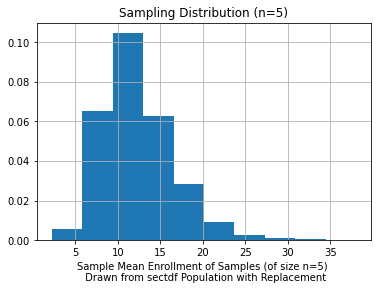

In [60]:
multi_unit_sample['multi_unit'].hist(density=True)
plt.title('Sampling Distribution (n=5)')
plt.xlabel('Sample Mean Enrollment of Samples (of size n=5) \n Drawn from sectdf Population with Replacement')
plt.show()

#### 6.4. [1.5 pt] What percent of sample mean multi_unit rates in this sampling distribution are at least as large as the mean multi_unit rate of Champaign and it's four neighboring counties (calculated in 5.2)?

In [64]:
multi_unit_sample[multi_unit_sample['multi_unit'] >= five_counties['multi_unit'].mean()].shape



(931, 1)

In [65]:
multi_unit_sample.shape

(5000, 1)

In [66]:
percentage = 931/5000

#### 6.5. Which is more unusually high:
* the multi_unit rate of Champaign county,
* or the average multi_unit rate of Champaign county and it's four neighboring counties?

#### Explain.

The multi_unit rate of Champaign county will be higher because the multi-unit of Champaign is 35.2, which is much higher than other multi_unit rate of the other four neighboring countries.